# Capstone project: Fake news detection using NLP

**Overview**: In this project, goal is to come up with a model to detect fake news using NLP.

## Getting started

The data is sourced from [kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?resource=download). It contains near 18k of fake news text and around 20k of true news text compiled from various sources. It contains 4 columns maily comprising the title of news, the actual text, subject and publishing date.

## Business understanding

We have to figure out the key drivers which can be used to predict whether a piece of news is true or fake given its features.

### Business objectives
* To be able to predict whether a piece of news is true or false.
* To enable readers/consumers as well as producers/sources a way to tell whether a news article is fake or not and whether they should care about it or not.

## Data understanding






In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
fake = pd.read_csv('data/Fake.csv')

In [3]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


There are 23K entries in the fake data set.

In [4]:
fake['class'] = 0

In [5]:
fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


We added a class feature to mark the fake ones as 0.

In [6]:
true = pd.read_csv('data/True.csv')

In [7]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


Around 21K entries in true news dataset.

In [8]:
true['class'] = 1

In [9]:
true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


We added a class feature with a value of 1 to mark all true entries.

In [10]:
news = fake.append(true, ignore_index=True)

<ipython-input-10-4f6ef49c4509>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = fake.append(true, ignore_index=True)


In [11]:
news

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


### Futher data exploration

In [12]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [13]:
news.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

Merged both datasets to create one dataset. In total, now we have around 45K articles with no null values.

In [14]:
# Summary statistics of text length

char_count = news.text.apply(len)
print('Mean character count:', char_count.mean())
print('Min character count:', char_count.min())
print('Max character count:', char_count.max())

Mean character count: 2469.1096930820972
Min character count: 1
Max character count: 51794


Text(0.5, 0, 'Text')

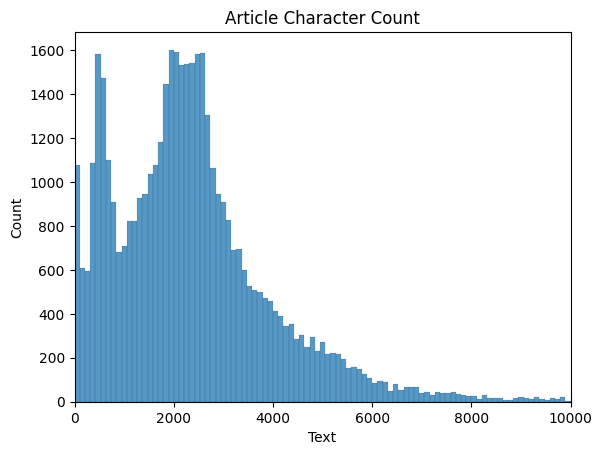

In [15]:
# Plotting the histogram from article characters

fig, ax = plt.subplots()
sns.histplot(char_count, ax = ax).set_title('Article Character Count')
ax.set_xlim(0, 10000)
plt.xlabel('Text')

The above article character count plot resembles the above summary report where the text with +/- 2500 characters resembles most of the data.

Text(0, 0.5, 'Count')

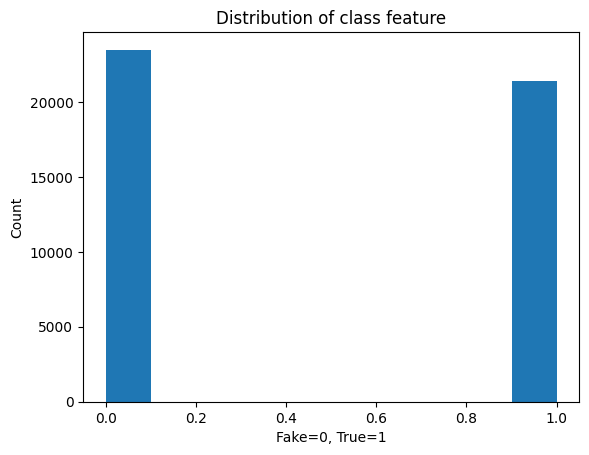

In [16]:
plt.hist(news['class'])
plt.title('Distribution of class feature')
plt.xlabel('Fake=0, True=1')
plt.ylabel('Count')

The distribution between fake(0) and true(1) news is almost balanced in our dataset.

Post examining the data, we could see that the problem is leaning towards a classification problem (where we would classify a news as fake or true). To achieve that, we added a field `class` which has a value of 0 (fake) or 1(true). We also merged the two separate datasets to create one news dataset (comprising both fake and true news) so that we can analyze better.

Finally, the business objective we arrived post after understanding of data is that we would like to classify whether a news is fake or not.

## Data preparation

In [17]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics._plot.confusion_matrix import confusion_matrix,ConfusionMatrixDisplay

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tokenize.punkt import string
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
y = news['class']
X = news['text']

We chose title, text and subject as the dependent variables based on which we will predict class.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [21]:
def pre_process(text):
    '''
    This function takes in a text and returns
    a list of pre processed text.
    
    Arguments
    ---------
    text: str
        text to be pre processed
        
    Returns
    -------
    str
       string of pre process words from text input
    '''

    # Tokenization
    tokenizer = TweetTokenizer(preserve_case = False)
    # stop words
    stop_words = stopwords.words('english')
    # punctuation
    punctuation = list(string.punctuation)
    # Stemming
    stemmer = PorterStemmer()
    # lemmatizer
    lemmatizer = WordNetLemmatizer()

    processed_text = []
    for line in text:
        tokens = tokenizer.tokenize(line)
        stemmed_words = [stemmer.stem(word) for word in tokens if word not in stop_words and word not in punctuation]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
        processed_text.append(lemmatized_words)
    return processed_text

Updating X_train with preprocessed text.

In [22]:
X_train = [' '.join(row) for row in pre_process(X_train)]

Updating X_test with preprocessed text.

In [23]:
X_test = [' '.join(row) for row in pre_process(X_test)]

## Modeling

As discussed earlier, this is a classification problem and we will use various NLP classification techniuqes to figure out what works best for our modeling requirements. Techniques we are interested in are as follows:
* Naive Bayes
* Logistic Regression
* Decision Trees
* Passive Aggressive Classifier

We will perform a Grid search (RandomizedGridSearch for the sake of speed) to cross-validate the models and figure out what will work for us.


In [24]:
# Performance dictionary to store the performance of various algorithms.
# This we can use to figure out which algo is performing the best.

performance_dict = {'algo': ['NB', 'Logistic Regression', 'Decision Trees', 'Passive Aggressive Classifier'],
                    'best_params': ['', '', '', ''],
                    'accuracy_train_score': [0.0, 0.0, 0.0, 0.0],
                    'accuracy_test_score': [0.0, 0.0, 0.0, 0.0],
                    'precision_train_score': [0.0, 0.0, 0.0, 0.0],
                    'precision_test_score': [0.0, 0.0, 0.0, 0.0],
                    'recall_train_score': [0.0, 0.0, 0.0, 0.0],
                    'recall_test_score': [0.0, 0.0, 0.0, 0.0],
                    'f1_train_score': [0.0, 0.0, 0.0, 0.0],
                    'f1_test_score': [0.0, 0.0, 0.0, 0.0],
                    'run_time':[0.0, 0.0, 0.0, 0.0]}


In [25]:
def calculate_run_time(cv):
  """
  Utility method to calculate the run time based on CV mean_fit_time
  and mean_score_time

  params(cv): cross valid search
  returns: run time(numeric in seconds) 

  """
  mean_fit_time= cv.cv_results_['mean_fit_time']
  mean_score_time= cv.cv_results_['mean_score_time']
  n_splits  = cv.n_splits_ #number of splits of training data
  n_iter = pd.DataFrame(cv.cv_results_).shape[0] #Iterations per split
  return np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter

In [26]:
def generate_confusion_matrix(conf_mat, model):
  """
  Utility method for generating confusion matrix.

  params(conf_mat): Confusion Matrix based on which plot will be generated
  return: Confusion Matrix plot

  """
  ax = plt.subplot()
  ConfusionMatrixDisplay(conf_mat).plot(ax=ax)
  ax.set_title(f"Confusion Matrix for {model}")
  ax.xaxis.set_ticklabels(['Fake', 'True'])
  ax.yaxis.set_ticklabels(['Fake', 'True'])

### Naive Bayes

In [27]:
nb_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                    ('bayes', MultinomialNB())])

In [28]:
nb_params = {
             'tfidf__max_features': [100, 500, 1000, 2000],
             'tfidf__stop_words': ['english', None],
             'bayes__alpha' : [1, 0.1, 0.01, 0.001, 0]
             }

In [29]:
#grid search 
nb_grid = RandomizedSearchCV(estimator = nb_pipe, param_distributions = nb_params, error_score='raise')
nb_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default val

RandomizedSearchCV(error_score='raise',
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('bayes', MultinomialNB())]),
                   param_distributions={'bayes__alpha': [1, 0.1, 0.01, 0.001,
                                                         0],
                                        'tfidf__max_features': [100, 500, 1000,
                                                                2000],
                                        'tfidf__stop_words': ['english', None]})

In [30]:

# stats
performance_dict['best_params'][0] = nb_grid.best_params_
performance_dict['accuracy_train_score'][0] = accuracy_score(y_train, nb_grid.predict(X_train))
performance_dict['accuracy_test_score'][0] = accuracy_score(y_test, nb_grid.predict(X_test))
performance_dict['precision_train_score'][0] = precision_score(y_train, nb_grid.predict(X_train))
performance_dict['precision_test_score'][0] = precision_score(y_test, nb_grid.predict(X_test))
performance_dict['recall_train_score'][0] = recall_score(y_train, nb_grid.predict(X_train))
performance_dict['recall_test_score'][0] = recall_score(y_test, nb_grid.predict(X_test))
performance_dict['f1_train_score'][0] = f1_score(y_train, nb_grid.predict(X_train))
performance_dict['f1_test_score'][0] = f1_score(y_test, nb_grid.predict(X_test))
performance_dict['f1_test_score'][0] = f1_score(y_test, nb_grid.predict(X_test))
performance_dict['run_time'][0] = calculate_run_time(nb_grid)


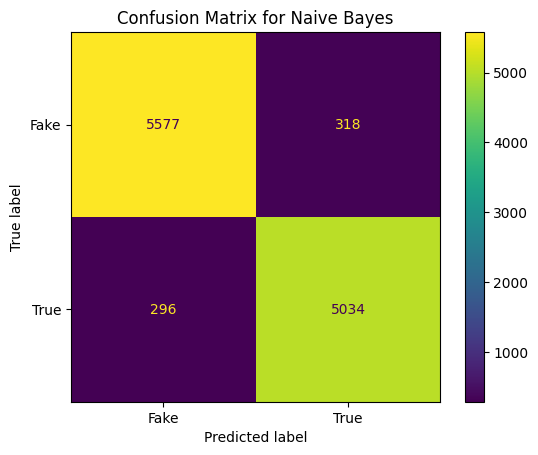

In [31]:
generate_confusion_matrix(confusion_matrix(y_test, nb_grid.predict(X_test)), "Naive Bayes")

### Logistic Regression



In [32]:
lr_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                    ('lr', LogisticRegression())])

In [33]:
lr_params = {
             'tfidf__max_features': [100, 500, 1000, 2000],
             'tfidf__stop_words': ['english', None]
             }

In [34]:
#grid search 
lr_grid = RandomizedSearchCV(estimator = lr_pipe, param_distributions = lr_params)
lr_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('lr', LogisticRegression())]),
                   param_distributions={'tfidf__max_features': [100, 500, 1000,
                                                                2000],
                                        'tfidf__stop_words': ['english', None]})

In [35]:

# stats
performance_dict['best_params'][1] = lr_grid.best_params_
performance_dict['accuracy_train_score'][1] = accuracy_score(y_train, lr_grid.predict(X_train))
performance_dict['accuracy_test_score'][1] = accuracy_score(y_test, lr_grid.predict(X_test))
performance_dict['precision_train_score'][1] = precision_score(y_train, lr_grid.predict(X_train))
performance_dict['precision_test_score'][1] = precision_score(y_test, lr_grid.predict(X_test))
performance_dict['recall_train_score'][1] = recall_score(y_train, lr_grid.predict(X_train))
performance_dict['recall_test_score'][1] = recall_score(y_test, lr_grid.predict(X_test))
performance_dict['f1_train_score'][1] = f1_score(y_train, lr_grid.predict(X_train))
performance_dict['f1_test_score'][1] = f1_score(y_test, lr_grid.predict(X_test))
performance_dict['f1_test_score'][1] = f1_score(y_test, lr_grid.predict(X_test))
performance_dict['run_time'][1] = calculate_run_time(lr_grid)


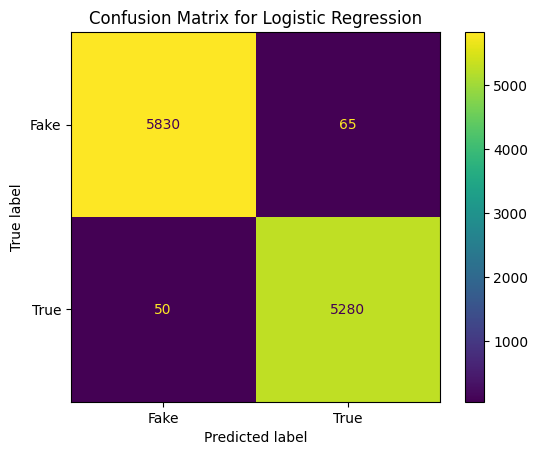

In [36]:
generate_confusion_matrix(confusion_matrix(y_test, lr_grid.predict(X_test)), "Logistic Regression")

## Decision Tree

In [37]:
dt_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                    ('dt', DecisionTreeClassifier())])

In [38]:
dt_params =  {
              'tfidf__max_features': [100, 500, 1000, 2000],
              'tfidf__stop_words': ['english', None],
              'dt__max_depth': [1,2,3,4,5,6],
             'dt__min_samples_split':  [0.05, 0.1, 0.5, 2],
             'dt__criterion': ['gini', 'entropy', 'log_loss'],
             'dt__min_samples_leaf': [0.05, 0.1, 0.5, 2, 5]}

In [39]:
dt_grid = RandomizedSearchCV(dt_pipe, param_distributions= dt_params)
dt_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('dt', DecisionTreeClassifier())]),
                   param_distributions={'dt__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'dt__max_depth': [1, 2, 3, 4, 5, 6],
                                        'dt__min_samples_leaf': [0.05, 0.1, 0.5,
                                                                 2, 5],
                                        'dt__min_samples_split': [0.05, 0.1,
                                                                  0.5, 2],
                                        'tfidf__max_features': [100, 500, 1000,
                                                                2000],
                                        'tfidf__stop_words': ['english', None]})

In [40]:
# stats
performance_dict['best_params'][2] = dt_grid.best_params_
performance_dict['accuracy_train_score'][2] = accuracy_score(y_train, dt_grid.predict(X_train))
performance_dict['accuracy_test_score'][2] = accuracy_score(y_test, dt_grid.predict(X_test))
performance_dict['precision_train_score'][2] = precision_score(y_train, dt_grid.predict(X_train))
performance_dict['precision_test_score'][2] = precision_score(y_test, dt_grid.predict(X_test))
performance_dict['recall_train_score'][2] = recall_score(y_train, dt_grid.predict(X_train))
performance_dict['recall_test_score'][2] = recall_score(y_test, dt_grid.predict(X_test))
performance_dict['f1_train_score'][2] = f1_score(y_train, dt_grid.predict(X_train))
performance_dict['f1_test_score'][2] = f1_score(y_test, dt_grid.predict(X_test))
performance_dict['f1_test_score'][2] = f1_score(y_test, dt_grid.predict(X_test))
performance_dict['run_time'][2] = calculate_run_time(dt_grid)

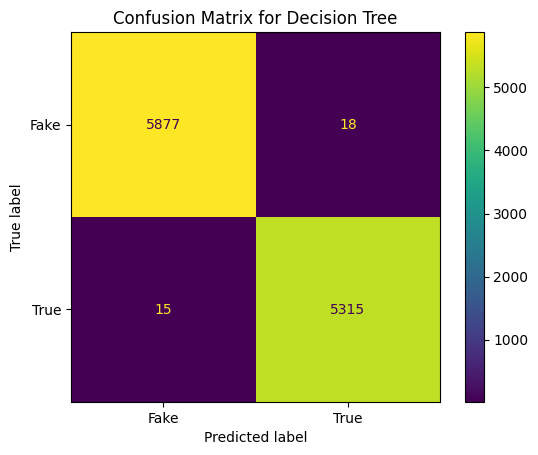

In [41]:
generate_confusion_matrix(confusion_matrix(y_test, dt_grid.predict(X_test)), "Decision Tree")

## Passive Aggressive Classifier

In [42]:
pac_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                    ('pac', PassiveAggressiveClassifier())])

In [43]:
pac_params =  {
              'tfidf__max_features': [100, 500, 1000, 2000],
              'tfidf__stop_words': ['english', None],
               'pac__max_iter' : [1000],
               'pac__C' : [0.5, 1],
             'pac__random_state' : [0, 5, 42]}

In [44]:
pac_grid = RandomizedSearchCV(pac_pipe, param_distributions= pac_params)
pac_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('pac',
                                              PassiveAggressiveClassifier())]),
                   param_distributions={'pac__C': [0.5, 1],
                                        'pac__max_iter': [1000],
                                        'pac__random_state': [0, 5, 42],
                                        'tfidf__max_features': [100, 500, 1000,
                                                                2000],
                                        'tfidf__stop_words': ['english', None]})

In [45]:
# stats
performance_dict['best_params'][3] = pac_grid.best_params_
performance_dict['accuracy_train_score'][3] = accuracy_score(y_train, pac_grid.predict(X_train))
performance_dict['accuracy_test_score'][3] = accuracy_score(y_test, pac_grid.predict(X_test))
performance_dict['precision_train_score'][3] = precision_score(y_train, pac_grid.predict(X_train))
performance_dict['precision_test_score'][3] = precision_score(y_test, pac_grid.predict(X_test))
performance_dict['recall_train_score'][3] = recall_score(y_train, pac_grid.predict(X_train))
performance_dict['recall_test_score'][3] = recall_score(y_test, pac_grid.predict(X_test))
performance_dict['f1_train_score'][3] = f1_score(y_train, pac_grid.predict(X_train))
performance_dict['f1_test_score'][3] = f1_score(y_test, pac_grid.predict(X_test))
performance_dict['f1_test_score'][3] = f1_score(y_test, pac_grid.predict(X_test))
performance_dict['run_time'][3] = calculate_run_time(pac_grid)

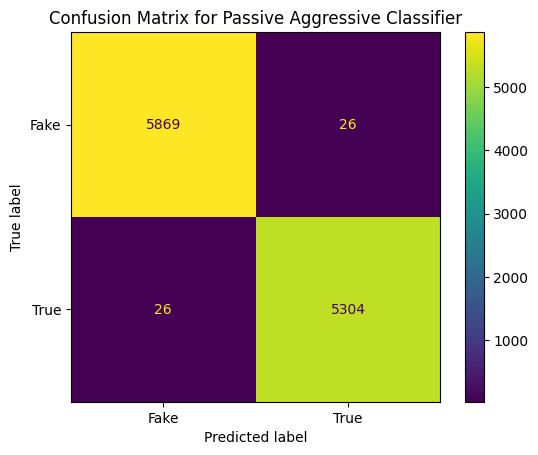

In [46]:
generate_confusion_matrix(confusion_matrix(y_test, pac_grid.predict(X_test)), "Passive Aggressive Classifier")

In [47]:
performance = pd.DataFrame(performance_dict)
performance

,algo,best_params,accuracy_train_score,accuracy_test_score,precision_train_score,precision_test_score,recall_train_score,recall_test_score,f1_train_score,f1_test_score,run_time
0,NB,"{'tfidf__stop_words': None, 'tfidf__max_featur...",0.944793,0.945301,0.939299,0.940583,0.945546,0.944465,0.942412,0.942520,385.956033
1,Logistic Regression,"{'tfidf__stop_words': None, 'tfidf__max_featur...",0.992397,0.989755,0.990945,0.987839,0.993162,0.990619,0.992052,0.989227,328.341929
2,Decision Trees,"{'tfidf__stop_words': None, 'tfidf__max_featur...",0.998040,0.997060,0.997392,0.996625,0.998508,0.997186,0.997950,0.996905,441.107744
3,Passive Aggressive Classifier,"{'tfidf__stop_words': None, 'tfidf__max_featur...",0.995456,0.995367,0.994415,0.995122,0.996084,0.995122,0.995249,0.995122,419.647971


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Result

Finally evaluating all the classifier and their respective results (and runtime), PAC (Passive Aggressive Classifier) seems to be the best classifier with decent runtime and scoring 99% in almost every aspect ( accuracy, precision, recall andd F1).

Accuracy seems to be a favourable score to consider here as the dataset is almost balanced.

Now lets do a deeper dive with our winner model (PAC) with some random testing.

## Random testing

To test, we will randomly pick 2 samples from our test data set and see whether our model accurately able to predict them correct or not.

Preprocessing for testing

In [48]:
real_X_train, real_X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [49]:
processed_X_train = [' '.join(row) for row in pre_process(real_X_train)]
processed_X_test = [' '.join(row) for row in pre_process(real_X_test)]

Actual test

In [50]:
print("input (True news) \n")
print(f"Actual text:\n{real_X_test.iloc[2]}\n")
print(f"Processed text:\n{processed_X_test[2]}\n")
print(f"Actual label: {y_test.iloc[2]}\n")
print(f"Predicted label: {pac_grid.predict(processed_X_test)[2]}\n")


input (True news) 

Actual text:
(Reuters) - Puerto Rico Governor Ricardo Rossello said on Wednesday he expected the federal government to waive the Jones Act, which would lift restrictions on ships that can provide aid to the island devastated by Hurricane Maria. He said he has been speaking with members of Congress from both parties who have supported an emergency waiver.      “We expect them to waive it,” Rossello said in an interview with CNN. He noted there was a seven-day waiver after Hurricane Irma, which was much less devastating to the island.     On Tuesday, the Trump administration said there was no need to waive shipping restrictions to help get fuel and supplies to storm-ravaged Puerto Rico, saying it would do nothing to address the island’s damaged ports, the main impediment to shipping. A waiver would allow Puerto Rico to get help not only from U.S. ships but from any ships that can bring aid.     “That is critical, particularly for fuel,” he said. “One of the considerat

In [51]:
print("input (Fake news) \n")
print(f"Actual text:\n{real_X_test.iloc[205]}\n")
print(f"Processed text:\n{processed_X_test[205]}\n")
print(f"Actual label: {y_test.iloc[205]}\n")
print(f"Predicted label: {pac_grid.predict(processed_X_test)[205]}\n")

input (Fake news) 

Actual text:
21st Century Wire says Yesterday we learned that for more than one year the FBI s White Collar Crime Division has actually been investigating a pay-for-play activity between Hillary Clinton and the Clinton Foundation. The investigation has been going on for more than a year. According FOX anchor Bret Baier, multiple FBI sources said,  indictments are likely. This could get very interesting A number of new revelations could really raise the temperature on this scandal:Last night, an RT Exclusive revealed what Julian Assange described as, the most significant email in the whole collection. Conveniently ignored by the mainstream media, WikiLeaks had previously highlighted an early 2014 email where outgoing Secretary of State Hillary Clinton is urging John Podesta, then an advisor to President Barack Obama, to  bring pressure  on Qatar and Saudi Arabia,  which are providing clandestine financial and logistic support to ISIL [Islamic State, IS, ISIS] and oth

Thus this concludes our testing for the model. We can see above that our model is predicting well for both true and fake news.

## Conclusion

We were able to successfully classify a body of text whether it is fake or not using Passive Aggressive Classifier. We may like to deep dive in the performance of the model with the help of ML debugging. As we have seen above, our PAC model is performing with accuracy of 99.5%.

We also performed random prediction tests where we were able to see that when we input regular text with its pre-decided class, the model was able to accurately predict its class too.

Extenral stakeholders can use this model to train and predict new text bodies.

## Future work

Although, our model is working great but one important thing we would like to highlight over here is that fake news detection is more than just a block of text.

In real world, fake news has lot of attributes like its source, the medium it was shared, cross-reference and much more.

For a more accurate fake news detection, we have to consider the above pointers.

### Next course of actions


* Debugging and feature importance to deeply understand how our model is evaluating. 
* Try out deep learning techniques like RNN & LSTM to see how that performs against regular PAC.
* As mentioned above, we should consider other attributes such as source of news, cross-referencing from some popular fact-finding websites, etc. to make the prediction more accurate.
* Convert the model into an API so that it can be used by external stakeholders.

